**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo (   )

---


Aluna(o): Arthur Gomes de Siqueira 

---

Aluna(o): Ricardo Ataide de Oliveira Junior


#Especificação do problema : Árvore de Decisão

A área financeira é uma área muito interessante para a aplicação de técnicas de Inteligência Artificial. Por exemplo, pode-se desenvolver aplicações que dêem suporte aos agentes financeiros na concessão ou não de crédito aos seus clientes. Pode-se também utilizar-se das técnicas de Inteligência Artificial para a identificação de atividades fraudulentas.

Utilizando a base de dados [Paysim](https://www.kaggle.com/ealaxi/paysim1) projete e implemente uma árvore de decisão para a identificação de fraudes. Utilize a referência a seguir para a visualização da árvore projetada.

[Para visualização de uma AD.](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

**Observação**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e a contribuição de cada membro deverá ser devidamente identificado


## Video

Link: https://drive.google.com/file/d/1EIdPQhZCBIJWyBfScIki1i4nWV2f0mdM/view?usp=sharing

In [ ]:
import pandas as pd
#Monte o drive no colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Fazendo upload dos arquivos
from google.colab import files
uploaded = files.upload()

Saving dados_csv10000.csv to dados_csv10000 (1).csv


In [ ]:
import pandas as pd

In [ ]:
#new_df = pd.read_csv("dados_csv10000.csv")
new_df = pd.read_csv('/content/drive/MyDrive/Inteligencia_Artificial/base_corrigida.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Importa Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importa train_test_split function
from sklearn import metrics #Importa scikit-learn metrics module

#coluna que iremos usar no nosso problema
feature_cols = ['step', 'amount','oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']

x = new_df[feature_cols] # Features
y = new_df.isFraud # Target variable

In [ ]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,0
3,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
3862195,743,339682.13,339682.13,0.00,0.00,339682.13,0
3862196,743,6311409.28,6311409.28,0.00,0.00,0.00,0
3862197,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
3862198,743,850002.52,850002.52,0.00,0.00,0.00,0


In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
3862195    1
3862196    1
3862197    1
3862198    1
3862199    1
Name: isFraud, Length: 3862200, dtype: int64

In [ ]:
# Separa o dataset em training set e test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Criando Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Prevendo a resposta para o test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, quanto frequente o classificador esta correto
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99


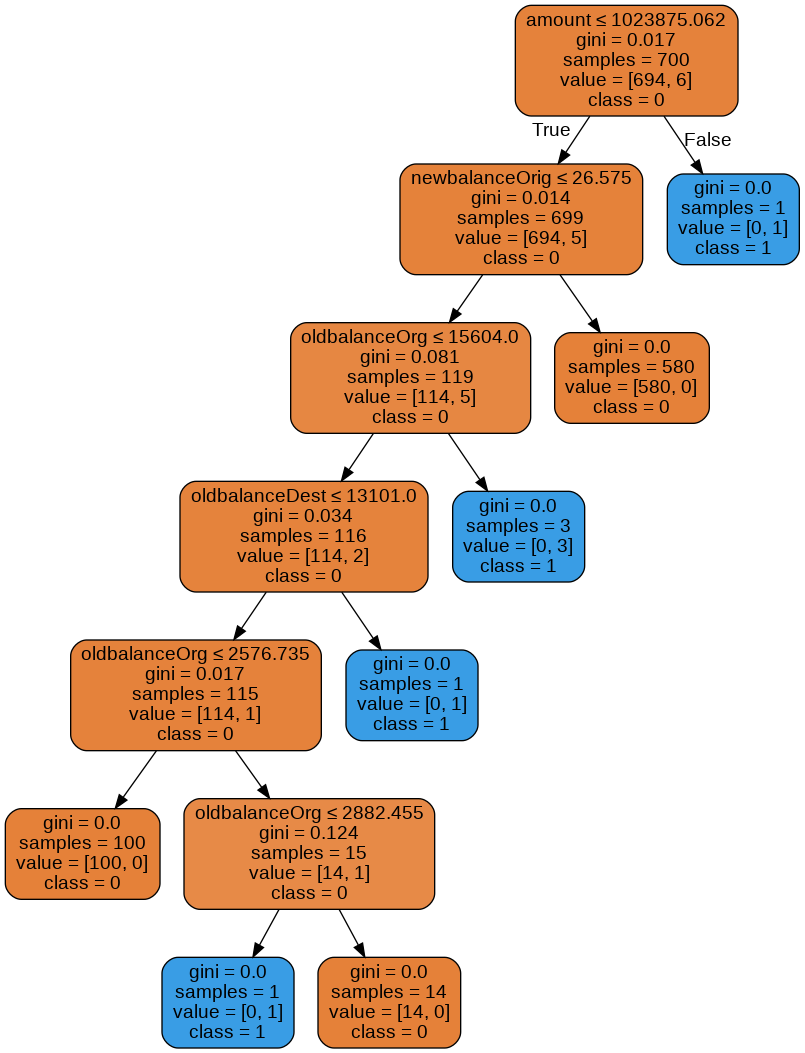

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fraude.png')
Image(graph.create_png())

#Complexidade

Complexidade de Tempo: O(n) - onde n é a quantidade de dados

Complexidade de Espaço: O(n), onde n é a quantidade de dados


## Soluçoes Alternativas

- Um dos trabalhos que verificamos é esse que detecta Fraudes utilizando Machine Learning no e-Commerce

- Faz uma utilização da Arvore de Decisão para descobrir se é fraude ou não é e utiliza o machine learning como base para descobrir. 

https://thesai.org/Downloads/Volume10No9/Paper_43-Fraud_Detection_using_Machine_Learning_in_E_Commerce.pdf

## Referencia

https://towardsdatascience.com/id3-decision-tree-classifier-from-scratch-in-python-b38ef145fd90

https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

https://scikit-learn.org/stable/modules/tree.html

https://www.geeksforgeeks.org/decision-tree-implementation-python/